<a href="https://colab.research.google.com/github/congardiner/ML-Projects/blob/main/notebooks/hint_xgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn==1.5.2

,date
0,20141104T000000
1,20150115T000000
2,20141014T000000
3,20141208T000000
4,20140815T000000


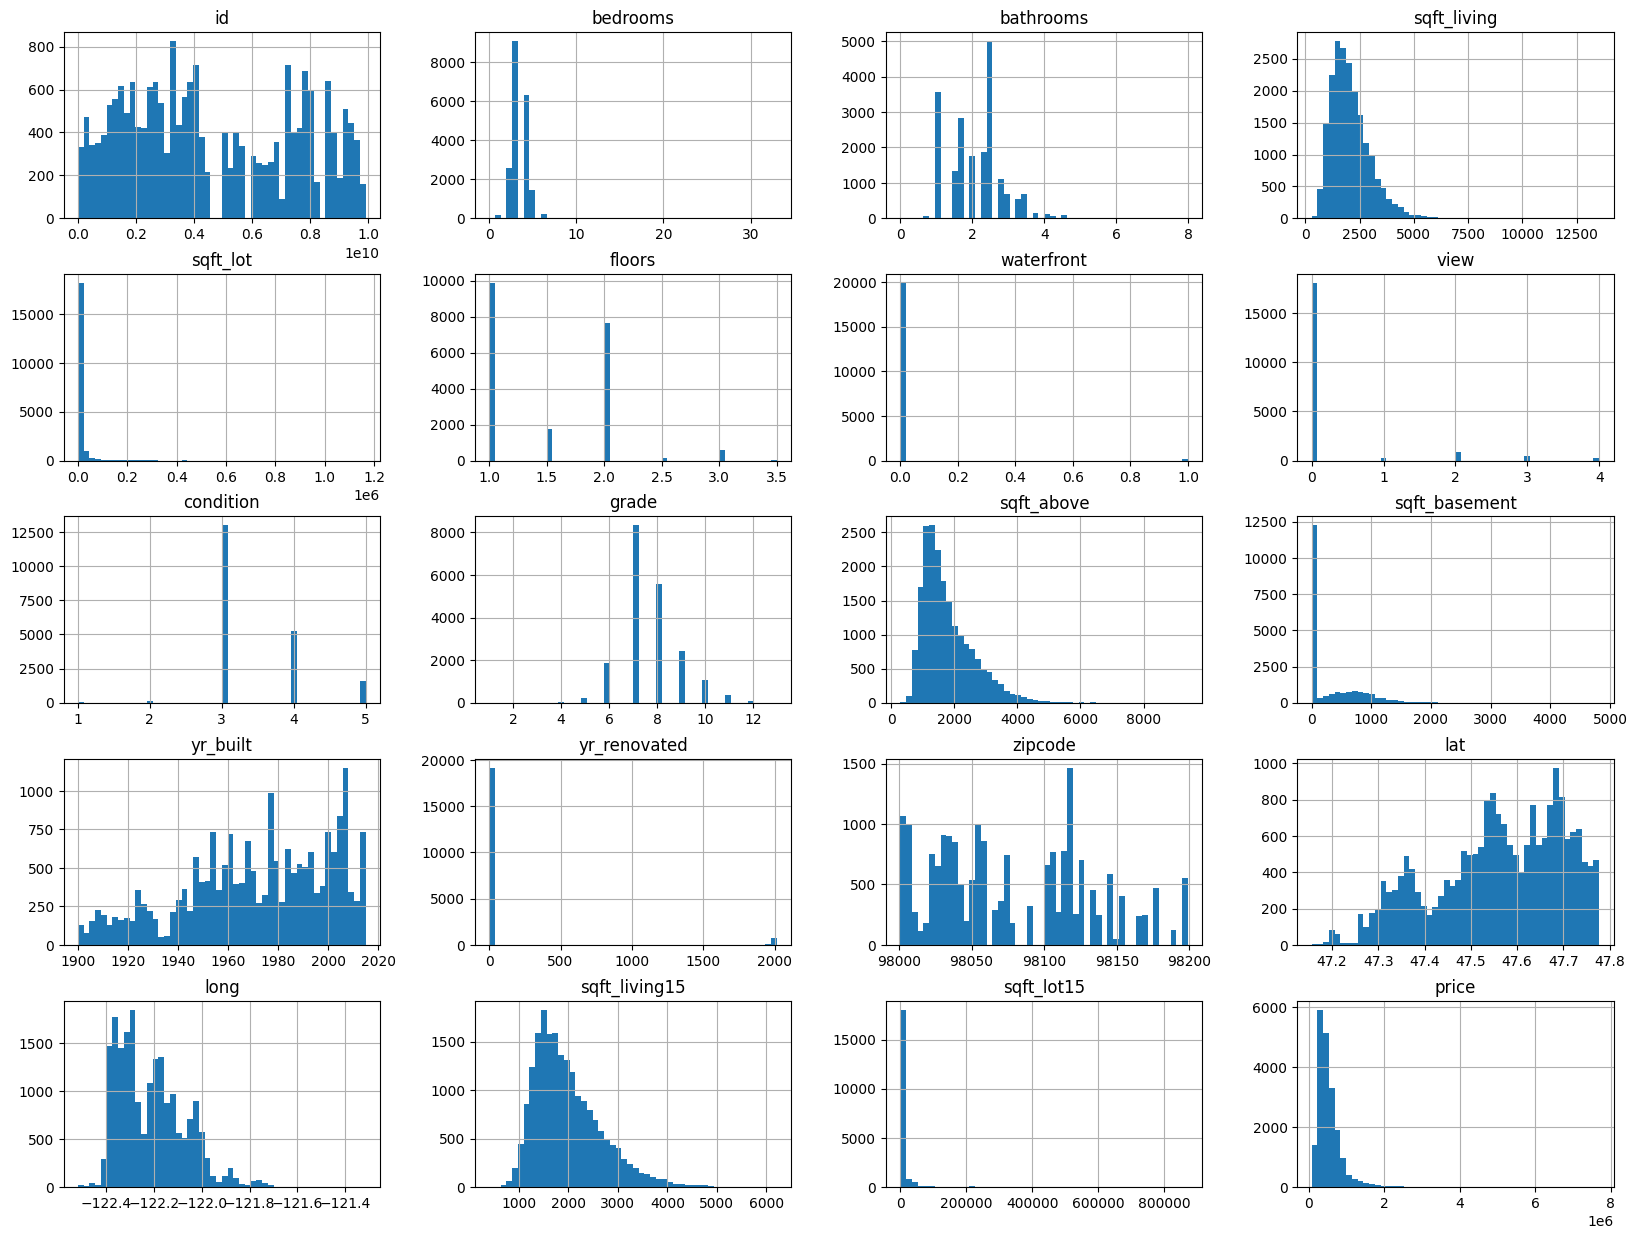

In [21]:
import pandas as pd
housing = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')
housing.describe()
housing.head()
housing.shape


# DATA EXPLORATION PHASE
housing.hist(bins=50, figsize=(20,15))
# housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

housing['yr_built'].describe()


housing['price'].describe()
housing['price'].median()

housing['bedrooms'].describe()
housing['bedrooms'].head()
housing['bedrooms'].value_counts()


housing['bathrooms'].value_counts()
housing['bathrooms'].describe()

housing['grade'].describe()
housing['grade'].value_counts()

housing['sqft_living'].describe()
housing['sqft_living'].value_counts()


housing['date'].describe()
housing['date'].head()





In [ ]:
# Import the libraries we need
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>],
       [<Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>,
        <Axes: title={'center': 'view'}>],
       [<Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'sqft_basement'}>],
       [<Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>,
        <Axes: title={'center': 'zipcode'}>,
        <Axes: title={'center': 'lat'}>],
       [<Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'sqft_lot15'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

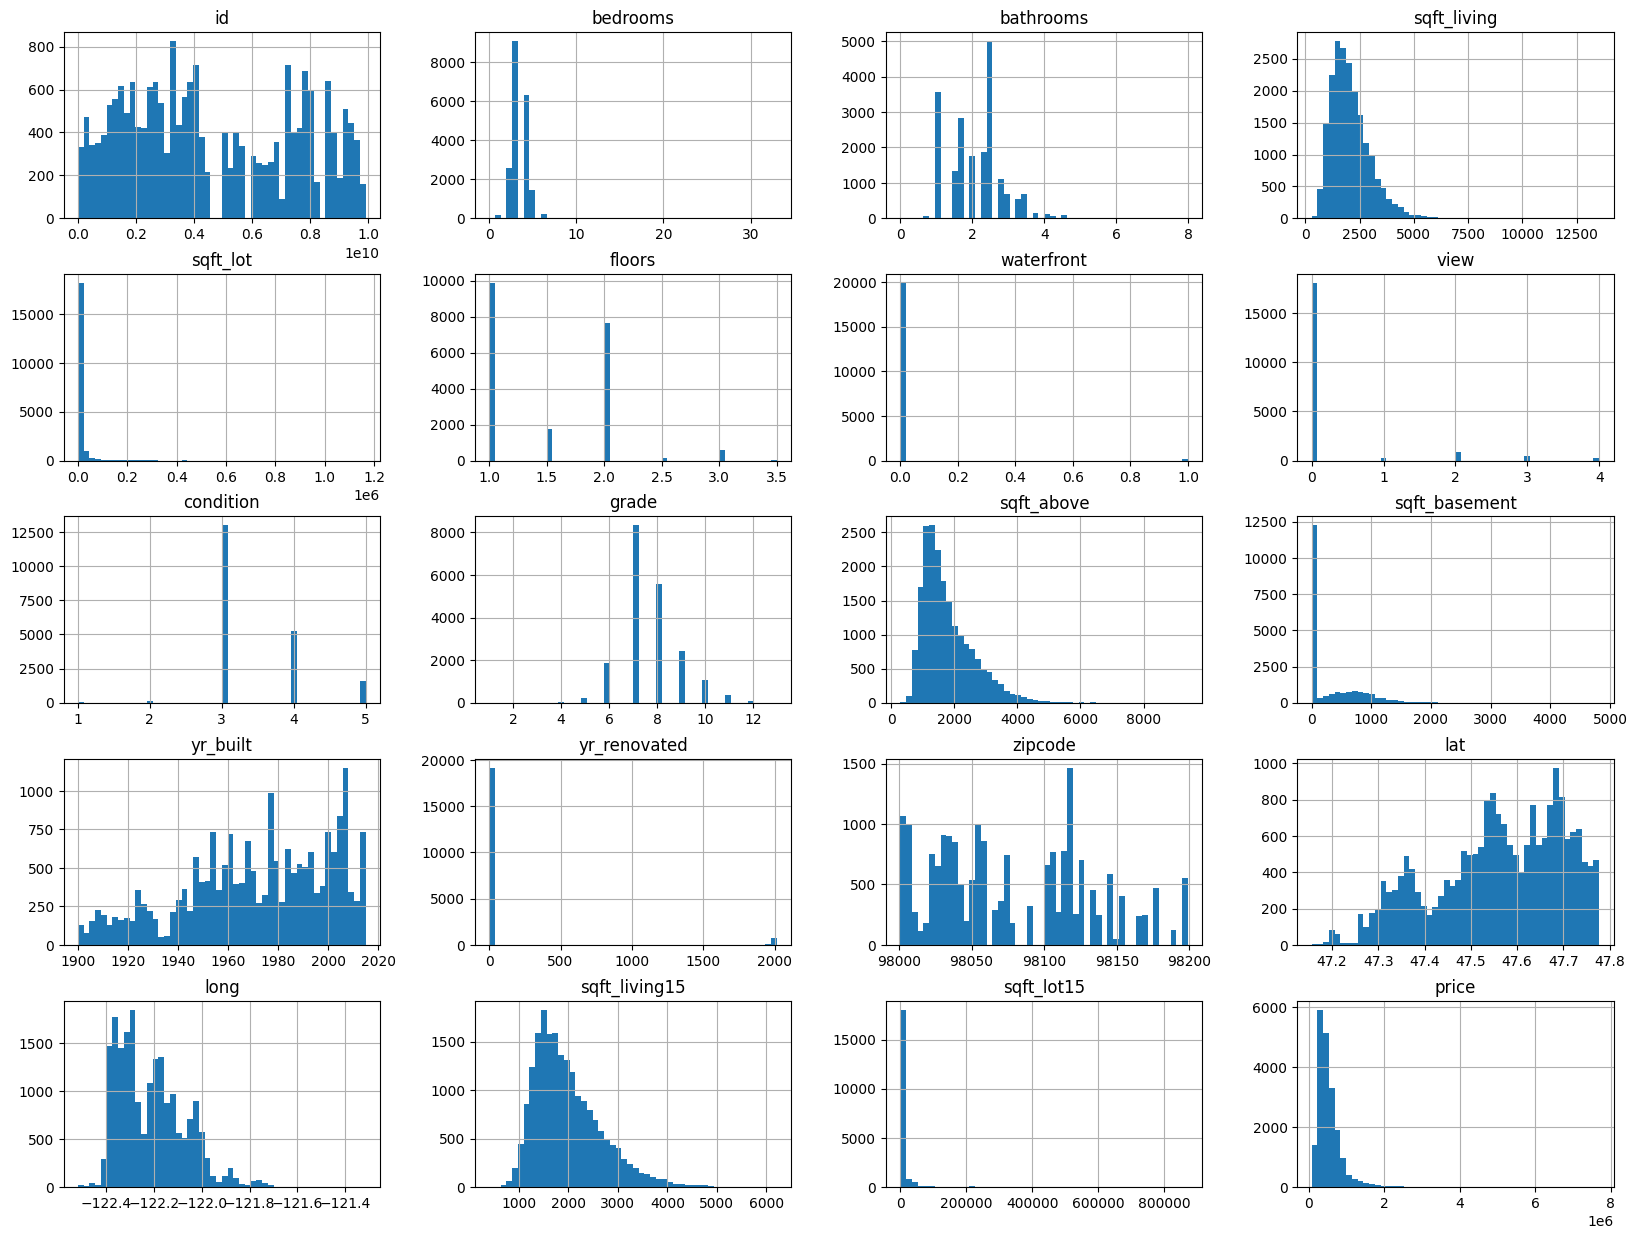

In [13]:
housing.hist(bins=50, figsize=(20,15))




In [23]:
housing_data = housing.copy()

housing_data.describe()


# THis is how I changed the date to accomondate for a way to read this into new columns using

housing_data['date'] = pd.to_datetime(housing_data['date'])
housing_data['year'] = housing_data['date'].dt.year
housing_data['month'] = housing_data['date'].dt.month
housing_data['day'] = housing_data['date'].dt.day

housing_data.describe()



KeyError: ('year', 'month', 'day')

In [19]:
# Feature Importance TIME

feature_importance = housing_data.corr()
feature_importance['price'].sort_values(ascending=False)



ValueError: could not convert string to float: '20141104T000000'

In [ ]:
# Splitting and Training into Datasets...

X = housing_data[['', 'displacement', 'acceleration', 'weight']]
y = housing_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Default Hyper Parameters applied, to be fine tuned and tested once data exploration is complete.

model = XGBRegressor()
model.fit(X_train, y_train)

[19:01:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
# Predictions for the DF using basic XG BOOST.

predictions = model.predict(X_test)
predictions

array([17.491123 , 32.880005 , 31.357609 , 33.983986 , 27.449415 ,
       14.397035 , 30.566387 , 23.904556 , 23.36834  , 12.525922 ,
       15.028317 , 23.38249  , 34.39683  , 28.032757 , 21.766737 ,
       36.92878  , 24.663647 , 18.438667 , 23.827766 , 14.161707 ,
       32.843884 , 28.706932 , 23.573576 , 13.936852 , 19.6191   ,
       15.062734 , 26.71001  , 12.721564 , 31.590557 , 30.566387 ,
       26.64318  , 29.139936 , 15.5338745, 35.46889  , 25.734348 ,
       22.30479  , 27.059273 , 19.580368 , 33.433327 , 21.226337 ,
       13.486583 , 22.30479  , 23.071053 , 19.917553 , 22.226343 ,
       20.763674 , 35.29183  , 22.745434 , 32.73291  , 26.189714 ,
       30.566387 , 30.566387 , 27.318785 , 19.6697   , 24.75744  ,
       17.11143  , 19.917553 , 33.983986 , 33.045113 , 33.282223 ,
       19.248236 , 14.200866 , 15.829767 , 19.295088 , 19.917553 ,
       29.152843 , 33.241314 , 31.413479 , 25.32427  , 26.59731  ,
       15.062734 , 15.438462 , 23.938917 , 29.139936 , 15.3102

In [ ]:
# Compute the Root Mean Squared Error of the predictions
from sklearn.metrics import root_mean_squared_error

result_RMSE = root_mean_squared_error(y_test, predictions)
result_RMSE


4.564261928491861